# Description

This dataset consists of 101 animals from a zoo.
There are 16 variables with various traits to describe the animals.
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.
It is the perfect dataset for those who are new to learning Machine Learning.

### zoo.csv
Attribute Information: (name of attribute and type of value domain)

- animal_name: Unique for each instance
- hair Boolean
- feathers Boolean
- eggs Boolean
- milk Boolean
- airborne Boolean
- aquatic Boolean
- predator Boolean
- toothed Boolean
- backbone Boolean
- breathes Boolean
- venomous Boolean
- fins Boolean
- legs Numeric (set of values: {0,2,4,5,6,8})
- tail Boolean
- domestic Boolean
- catsize Boolean
- class_type Numeric (integer values in range [1,7])

### class.csv
This csv describes the dataset

- Class_Number Numeric (integer values in range [1,7])
- NumberOfAnimalSpeciesIn_Class Numeric
- Class_Type character -- The actual word description of the class
- Animal_Names character -- The list of the animals that fall in the category of the class

### Acknowledgements
UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Zoo

Source Information
-- Creator: Richard Forsyth
-- Donor: Richard S. Forsyth
8 Grosvenor Avenue
Mapperley Park
Nottingham NG3 5DX
0602-621676
-- Date: 5/15/1990

### Inspiration
What are the best machine learning ensembles/methods for classifying these animals based upon the variables given?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [2]:
df = pd.read_csv('zoo.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.shape

(101, 18)

### Let's check the duplicate, null values, Na values...

In [8]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [9]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [10]:
df2 = df
df2 = df2.drop_duplicates()

In [11]:
df2.shape

(101, 18)

There are no duplicates, null values, Na values !

### Correlation and Distribution checking.

In [12]:
sns.set_style('darkgrid')
sns.set_palette('dark')

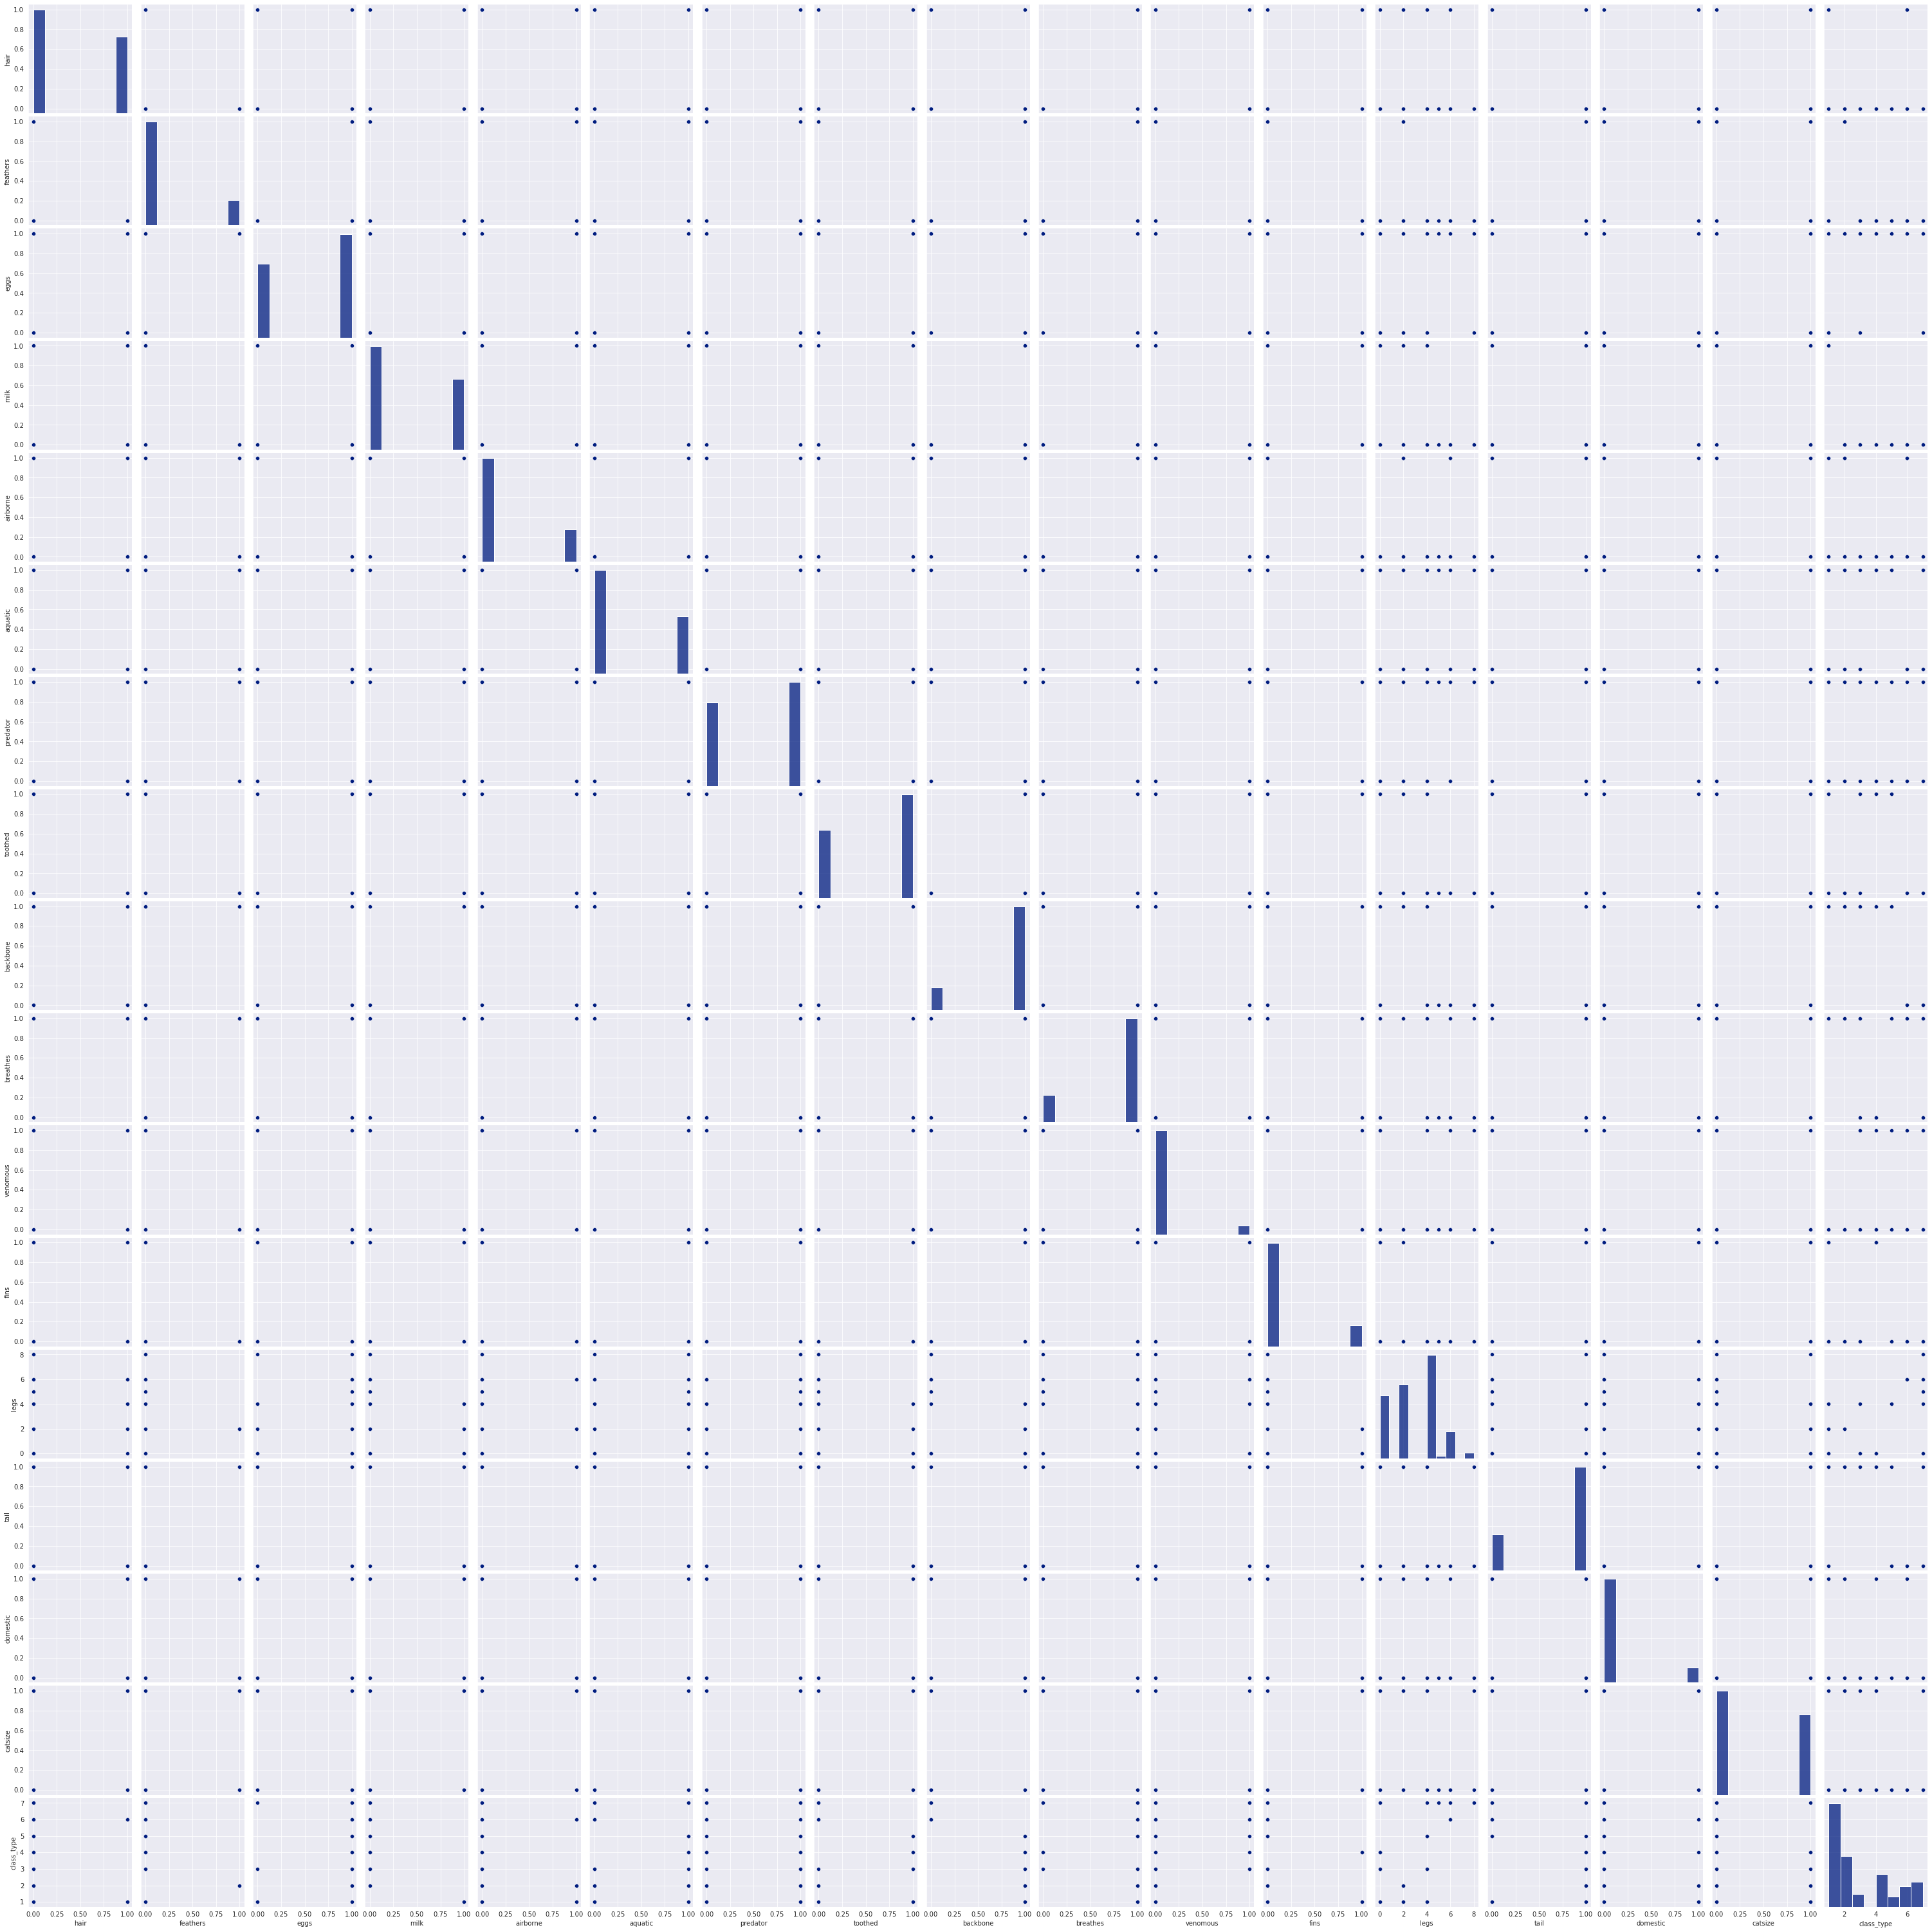

In [13]:
sns.pairplot(data = df)

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

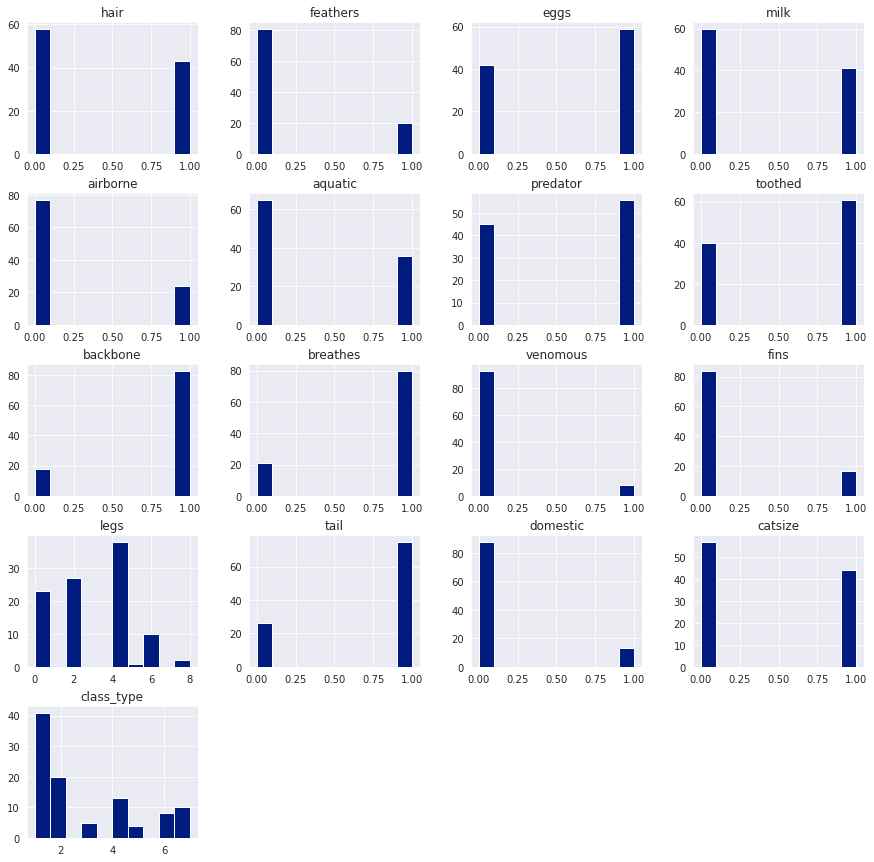

In [14]:
df.hist(figsize=(15,15))

<AxesSubplot:>

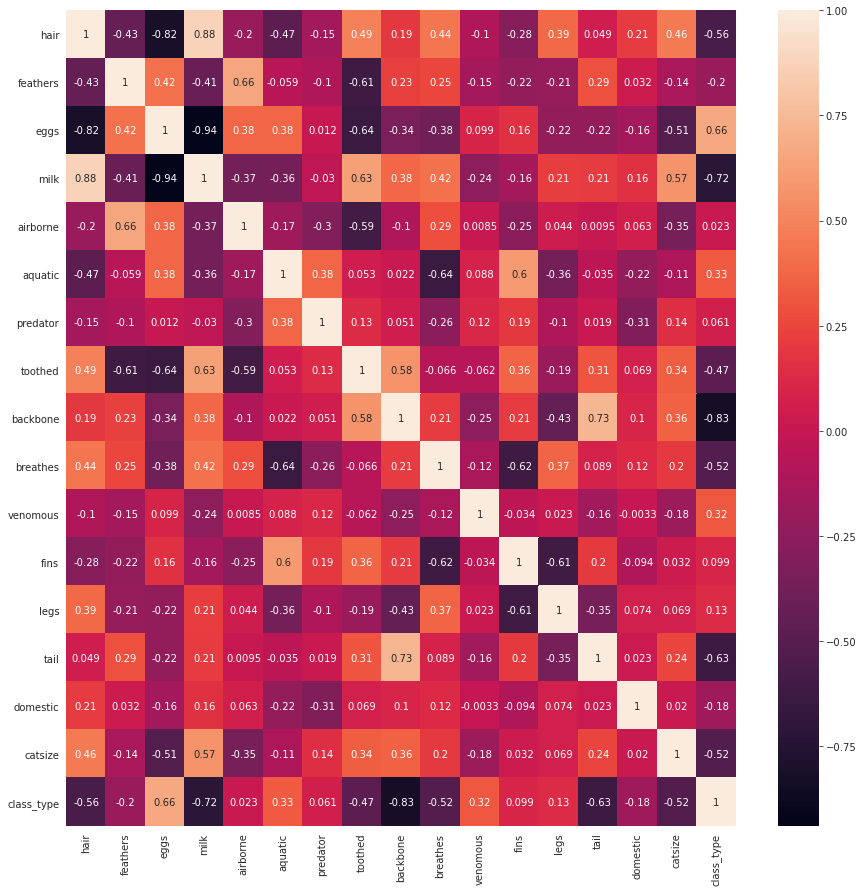

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot = True)

<AxesSubplot:xlabel='class_type', ylabel='count'>

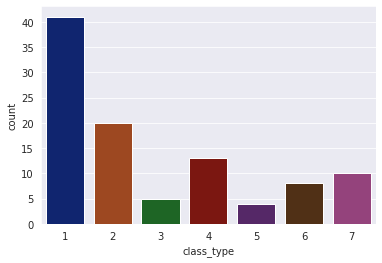

In [16]:
sns.countplot(data =df, x = 'class_type')

# Train, test splitting

In [17]:
X = df.drop(['animal_name', 'class_type'], axis = 1).values
y = df['class_type'].values
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoding
encoder = OneHotEncoder() 
y = encoder.fit_transform(y.reshape(-1,1)).toarray()

In [18]:
y.shape

(101, 7)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)

In [20]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [21]:
X_train_s.shape

(80, 16)

# Let's build a deep learning model to categorize the upcomming animals to the zoo.

In [46]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
model = Sequential()

model.add(Dense(units=16, input_dim=16, activation='relu'))
model.add(Dense(units=10,  activation='relu'))
model.add(Dense(units=7,  activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x=X_train_s,
          y=y_train, 
          epochs=50,
          batch_size=40,
          validation_data=(X_test_s, y_test)
          )

Epoch 1/50
2/2 [==============================] - 1s 310ms/step - loss: 0.7052 - accuracy: 0.0750 - val_loss: 0.6985 - val_accuracy: 0.0476
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6928 - accuracy: 0.0917 - val_loss: 0.6902 - val_accuracy: 0.0476
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6927 - accuracy: 0.1250 - val_loss: 0.6823 - val_accuracy: 0.0476
Epoch 4/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6797 - accuracy: 0.1250 - val_loss: 0.6745 - val_accuracy: 0.0476
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6742 - accuracy: 0.1500 - val_loss: 0.6670 - val_accuracy: 0.0952
Epoch 6/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6631 - accuracy: 0.1750 - val_loss: 0.6597 - val_accuracy: 0.0952
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6573 - accuracy: 0.1667 - val_loss: 0.6527 - val_accuracy: 0.0952
Epoch 8/50
2/2 [==========

<AxesSubplot:>

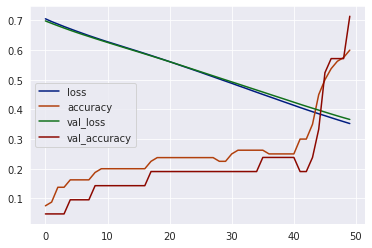

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

As we can see, this is not the best model for this data set ! The accuracy score is too low, and the losses is to high --> The model is underfitting!

### Let's tuning the hyperparameters !

- Add 1 more layer.
- The first layer contain more units.
- Increase the epoch numbers.
- Decrease the batch size.

In [27]:
model2 = Sequential()

model2.add(Dense(units=22, input_dim=16, activation='relu'))
model2.add(Dense(units=15,  activation='relu'))
model2.add(Dense(units=10,  activation='relu'))
model2.add(Dense(units=7,  activation='softmax'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 22)                374       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                345       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 77        
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.fit(x=X_train_s,
          y=y_train, 
          epochs=400,
          batch_size=20,
          validation_data=(X_test_s, y_test)
          )

Epoch 1/400
4/4 [==============================] - 0s 45ms/step - loss: 0.6255 - accuracy: 0.2367 - val_loss: 0.6225 - val_accuracy: 0.1905
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 0.6057 - accuracy: 0.2583 - val_loss: 0.6052 - val_accuracy: 0.1429
Epoch 3/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5863 - accuracy: 0.2233 - val_loss: 0.5882 - val_accuracy: 0.1905
Epoch 4/400
4/4 [==============================] - 0s 14ms/step - loss: 0.5739 - accuracy: 0.2483 - val_loss: 0.5714 - val_accuracy: 0.1905
Epoch 5/400
4/4 [==============================] - 0s 15ms/step - loss: 0.5473 - accuracy: 0.2550 - val_loss: 0.5542 - val_accuracy: 0.1905
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5295 - accuracy: 0.2417 - val_loss: 0.5369 - val_accuracy: 0.1905
Epoch 7/400
4/4 [==============================] - 0s 13ms/step - loss: 0.5179 - accuracy: 0.2117 - val_loss: 0.5197 - val_accuracy: 0.1905
Epoch 8/400
4/4 [===

<AxesSubplot:>

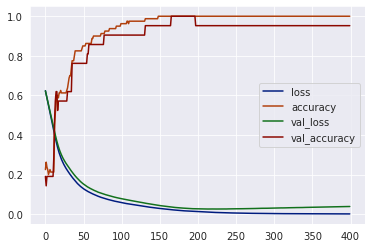

In [30]:
model_loss = pd.DataFrame(model2.history.history)
model_loss.plot()

As you can see the model's accuracy is much more better, however based on the loss scores the model is getting overfitting !!!

### Let's tuning the hyperparameters AGAIN!

- The first layer contain more units.
- Add 1 layer.
- Increase the epoch numbers.
- Use the earlystopping function to avoid the overfitting
- Decrease the batch size.

In [31]:
model3 = Sequential()

model3.add(Dense(units=30, input_dim=16, activation='relu'))
model3.add(Dense(units=25,  activation='relu'))
model3.add(Dense(units=18,  activation='relu'))
model3.add(Dense(units=10,  activation='relu'))
model3.add(Dense(units=7,  activation='softmax'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_9 (Dense)              (None, 18)                468       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                190       
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 77        
Total params: 2,020
Trainable params: 2,020
Non-trainable params: 0
_________________________________________________________________


In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [34]:
model3.fit(x=X_train_s,
          y=y_train, 
          epochs=500,
          batch_size=20,
          validation_data=(X_test_s, y_test),
           callbacks=[early_stop]
          )

Epoch 1/500
4/4 [==============================] - 0s 46ms/step - loss: 0.7274 - accuracy: 0.0717 - val_loss: 0.7130 - val_accuracy: 0.1429
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7093 - accuracy: 0.1333 - val_loss: 0.6996 - val_accuracy: 0.1429
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6979 - accuracy: 0.1183 - val_loss: 0.6901 - val_accuracy: 0.1429
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6885 - accuracy: 0.1067 - val_loss: 0.6841 - val_accuracy: 0.1429
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6821 - accuracy: 0.1283 - val_loss: 0.6791 - val_accuracy: 0.1429
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6767 - accuracy: 0.0950 - val_loss: 0.6735 - val_accuracy: 0.0952
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6705 - accuracy: 0.0867 - val_loss: 0.6662 - val_accuracy: 0.0952
Epoch 8/500
4/4 [===

<AxesSubplot:>

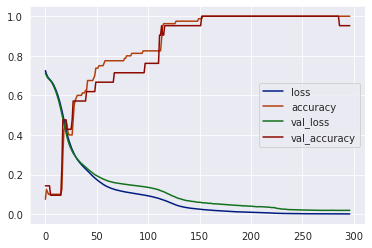

In [35]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.plot()

As you can see the results are much more better !

### Compare the models.

In [41]:
y_pred_1 = model.predict(X_test_s)
y_pred_2 = model2.predict(X_test_s)
y_pred_3 = model3.predict(X_test_s)
y_pred_1 = encoder.inverse_transform(y_pred_1.round())
y_pred_2 = encoder.inverse_transform(y_pred_2.round())
y_pred_3 = encoder.inverse_transform(y_pred_3.round())

In [42]:
y_test_norm = encoder.inverse_transform(y_test)

In [49]:
print('Model 1')
print(classification_report(y_test_norm, y_pred_1))

Model 1
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         9
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.43        21
   macro avg       0.06      0.14      0.09        21
weighted avg       0.18      0.43      0.26        21



In [50]:
print('Model 2')
print(classification_report(y_test_norm, y_pred_2))

Model 2
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.79      0.86      0.81        21
weighted avg       0.93      0.95      0.94        21



In [65]:
print('Model 3')
print(classification_report(y_test_norm, y_pred_3))

Model 3
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.95        21
   macro avg       0.95      0.93      0.92        21
weighted avg       0.97      0.95      0.95        21



In [62]:
pred_df = pd.DataFrame()
pred_df['Test'] = y_test_norm.flatten()
pred_df['Model1'] = y_pred_1.flatten()
pred_df['Model2'] = y_pred_2.flatten()
pred_df['Model3'] = y_pred_3.flatten()

In [63]:
pred_df

,Test,Model1,Model2,Model3
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,4,1,4,4
5,1,1,1,1
6,7,1,7,7
7,6,1,6,7
8,5,1,5,5
9,7,1,7,7


# Conclusion

**Data Preparation: In the first steps I have checked the null values, Na values and duplicates. The data set has not contained these. After this action I have started to prepare the data to the deep learning (Scaling, Splitting, Encoding... and so on.).**

**Main insights: The distribution of the classes was not the perfect one.**

**Create Models: I have used 3 differnet deep learning models to illustrate the differences between each other. (Epoch numbers, batch size... and so on)**

**Final Conclusion: Based on the figures I can recommend the 3rd model, because here we can avoid the over and under-fitting.**

**For the Future: Find better hyperparameters for the models or use different architecture models.**